In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

List of Hypothesis tested in this project

In [68]:

# Does the income in the holiday months of november,december is going to be more than 20% of remaining months individually in a year
# Does charging less-price per kilometer leads to more bookings.
# Does availability of more cabs in an area leads to more income.
# Does online payment or payment through card gives more profit percentage than made through cash.
# Does female population uses more cabs than male populations.


In [69]:
cab_data=pd.read_csv("/content/Cab_Data.csv")
city=pd.read_csv("/content/City.csv")
customer_info=pd.read_csv("/content/Customer_ID.csv")
transaction_info=pd.read_csv("/content/Transaction_ID.csv")

Exploratory Data Analysis


In [70]:
# Exploratory Data Analysis(EDA)
# Data Exploration of each file
cab_data.head(10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016 00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016 00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016 00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016 00:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016 00:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07/01/2016 00:00,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03/01/2016 00:00,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07/01/2016 00:00,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12/01/2016 00:00,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06/01/2016 00:00,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [5]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [6]:
city.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [8]:
customer_info.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [9]:
customer_info.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [10]:
transaction_info.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [11]:
transaction_info.describe()


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [12]:
cab_data['Date of Travel']=pd.to_datetime(cab_data['Date of Travel'])
# The date format was in milli seconds. so it was converted into dd/mm/yy format.

In [13]:

cab_data.tail(100)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359292,10439997,2018-04-01,Yellow Cab,WASHINGTON DC,40.17,561.73,563.9868
359293,10439998,2018-07-01,Yellow Cab,WASHINGTON DC,21.00,330.75,262.0800
359294,10440001,2018-08-01,Yellow Cab,WASHINGTON DC,22.04,347.13,296.2176
359295,10440002,2018-06-01,Yellow Cab,WASHINGTON DC,7.70,119.01,107.1840
359296,10440003,2018-03-01,Yellow Cab,WASHINGTON DC,17.82,236.08,235.2240
...,...,...,...,...,...,...,...
359387,10440101,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


Checking for null and duplicate values

In [109]:
print("No of null values ",cab_data.isnull().sum())
print("checking for duplicate values in each column")

for x in cab_data.columns:
  print("No of duplicate values present in columns {a}".format(a=x),cab_data[x].duplicated().sum())
  # here apart from transaction_info other features can have duplicated values and can be avoided.

No of null values  Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
checking for duplicate values in each column
No of duplicate values present in columns Transaction ID 0
No of duplicate values present in columns Date of Travel 358297
No of duplicate values present in columns Company 359390
No of duplicate values present in columns City 359373
No of duplicate values present in columns KM Travelled 358518
No of duplicate values present in columns Price Charged 260216
No of duplicate values present in columns Cost of Trip 343101


In [108]:
print("No of null values",transaction_info.isnull().sum())

print("checking for duplicate values in each column")

for x in transaction_info.columns:
  print("No of duplicate values present in columns {a}".format(a=x),transaction_info[x].duplicated().sum())

# Here it is ok to have duplicate values as the payment method has only two possible unique values and also it is normal that same customer would be using same company cab more than once.



No of null values Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
checking for duplicate values in each column
No of duplicate values present in columns Transaction ID 0
No of duplicate values present in columns Customer ID 390927
No of duplicate values present in columns Payment_Mode 440096


In [111]:
print("No of null values",city.isnull().sum())
print("checking for duplicate values in each column")

for x in city.columns:
  print("No of duplicate values present in columns {a}".format(a=x),city[x].duplicated().sum())

# here there are no null values.

No of null values City          0
Population    0
Users         0
dtype: int64
checking for duplicate values in each column
No of duplicate values present in columns City 0
No of duplicate values present in columns Population 0
No of duplicate values present in columns Users 0


In [112]:
print("No of null values",customer_info.isnull().sum())
print("checking for duplicate values in each column")

for x in customer_info.columns:
  print("No of duplicate values present in columns {a}".format(a=x),customer_info[x].duplicated().sum())
# We do have duplicate values in gender,age,income as we speak about gender there are only two possiblities and when it comes to age the chances of overlapping is possible and normal and also same for income.

# It is clear there are no null values in all files and no duplicate values were removed as these are needed in accessing data.

No of null values Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
checking for duplicate values in each column
No of duplicate values present in columns Customer ID 0
No of duplicate values present in columns Gender 49169
No of duplicate values present in columns Age 49123
No of duplicate values present in columns Income (USD/Month) 25830


Merging all files and making into a single data frame


In [82]:
# Merging all datasets into a single data so it just makes it easy to visualise and analyse for further EDA and for further null hypothesis.
combined_data = cab_data.merge(transaction_info, on= 'Transaction ID').merge(customer_info, on ='Customer ID').merge(city, on = 'City')
combined_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08/01/2016 00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21/07/2018 00:00,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23/11/2018 00:00,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06/01/2016 00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21/04/2018 00:00,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,04/05/2018 00:00,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,27/10/2018 00:00,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,02/01/2016 00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,21/09/2016 00:00,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,23/06/2017 00:00,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [15]:
# Since there are some columns names that are multi-worded with spaces between them. So, It is better to replace those spaces with underlines for ease of using it.
for columns in combined_data.columns:
    if ' ' in columns:
        combined_data = combined_data.rename(columns={columns:columns.replace(' ','_')})
combined_data.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,2018-04-05,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [16]:
# Extracting month and year from date_of_travel and assinging those value to new columns.
months_list=[]
years_list=[]
for x in combined_data.index:
  months_list.append(combined_data['Date_of_Travel'][x].month)
  years_list.append(combined_data['Date_of_Travel'][x].year)

combined_data['months']=months_list
combined_data['year']=years_list

Hypothesis 1: Does the income in the holiday months of november,december is going to be more than 20% of remaining months individually in a year (Null Hypothesis)

In [17]:
# Extracting a dataframe that has company as index and months as columns for first hypothesis.
monthly_transactions_for_pinkcab = combined_data[combined_data['Company']=='Pink Cab'].groupby(['months']).Transaction_ID.count()
print(monthly_transactions_for_pinkcab) # This is number of transactions happend in each month for 2016,2017,2018 for pink cab.

monthly_transactions_for_yellowcab = combined_data[combined_data['Company']=='Yellow Cab'].groupby(['months']).Transaction_ID.count()
print(monthly_transactions_for_yellowcab) # This is number of transactions happend in each month for 2016,2017,2018 for yellow cab.


months
1     4734
2     4693
3     5724
4     5118
5     6150
6     6371
7     7048
8     8011
9     8518
10    9936
11    8679
12    9729
Name: Transaction_ID, dtype: int64
months
1     17108
2     17338
3     20754
4     19077
5     21309
6     20568
7     23177
8     24027
9     25377
10    29273
11    26538
12    30135
Name: Transaction_ID, dtype: int64


the average income from months january to october for yellow cabs is: 21800.8
the percentage difference between the first ten months and november is 21.72947781732781 %
the percentage difference between the first ten months and december is 38.22887233496019 %


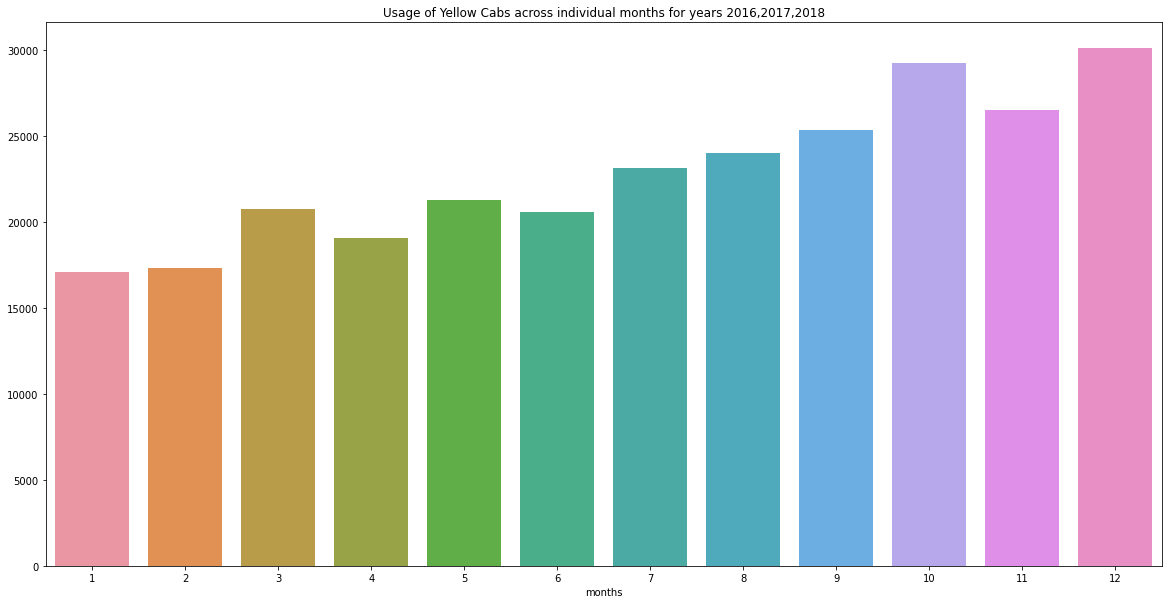

In [49]:
print("the average income from months january to october for yellow cabs is:",monthly_transactions_for_yellowcab.loc[0:10].mean())
print("the percentage difference between the first ten months and november is",((monthly_transactions_for_yellowcab.loc[11]-monthly_transactions_for_yellowcab.loc[0:10].mean())/monthly_transactions_for_yellowcab.loc[0:10].mean())*100,"%")
print("the percentage difference between the first ten months and december is",((monthly_transactions_for_yellowcab.loc[12]-monthly_transactions_for_yellowcab.loc[0:10].mean())/monthly_transactions_for_yellowcab.loc[0:10].mean())*100,"%")

plt.figure(figsize=(20,10))
sns.barplot(x=monthly_transactions_for_yellowcab.index,y=monthly_transactions_for_yellowcab.values)
plt.title('Usage of Yellow Cabs across individual months for years 2016,2017,2018')
plt.show()

#It is clear from the evidence that both months i.e., november and december has more than 20% increase in income compared to other months average incomes.
#So, it can be concluded that null hypothesis is valid for yellow cabs.


the average income from months january to october for pink cabs is: 6630.3
the percentage difference between the first ten months and november is 30.899054341432507 %
the percentage difference between the first ten months and december is 46.73544183521107 %


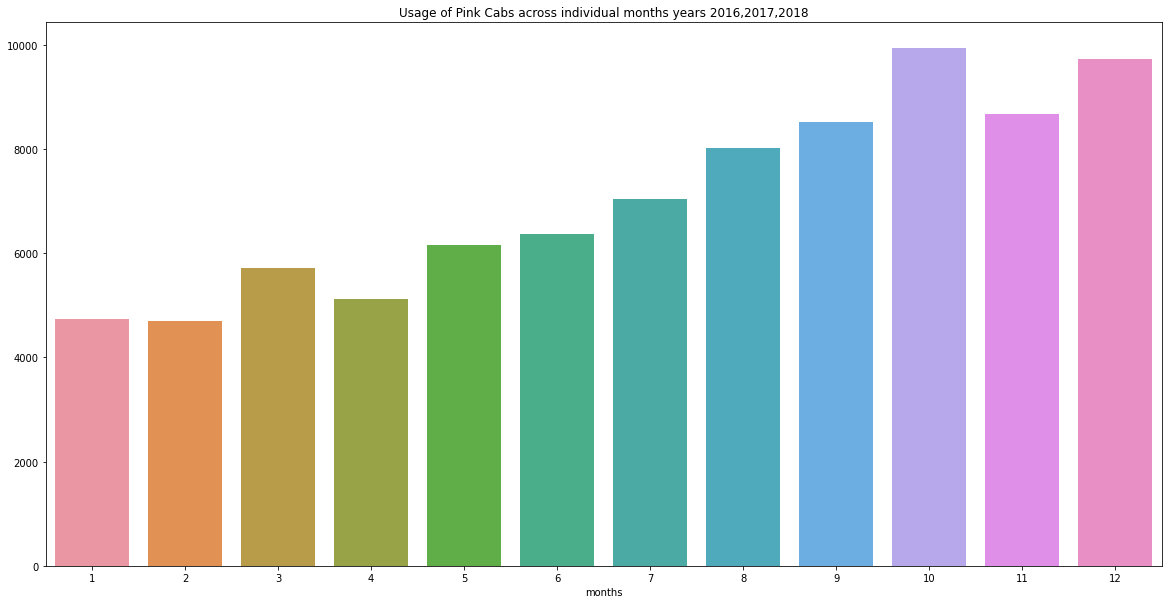

In [50]:
print("the average income from months january to october for pink cabs is:",monthly_transactions_for_pinkcab.loc[0:10].mean())
print("the percentage difference between the first ten months and november is",((monthly_transactions_for_pinkcab.loc[11]-monthly_transactions_for_pinkcab.loc[0:10].mean())/monthly_transactions_for_pinkcab.loc[0:10].mean())*100,"%")
print("the percentage difference between the first ten months and december is",((monthly_transactions_for_pinkcab.loc[12]-monthly_transactions_for_pinkcab.loc[0:10].mean())/monthly_transactions_for_pinkcab.loc[0:10].mean())*100,"%")

plt.figure(figsize=(20,10))
sns.barplot(x=monthly_transactions_for_pinkcab.index,y=monthly_transactions_for_pinkcab.values)
plt.title('Usage of Pink Cabs across individual months years 2016,2017,2018')
plt.show()
#It is clear from the evidence that both months i.e., november and december has more than 20% increase in income compared to other months average incomes.
#So, it can be concluded that null hypothesis is valid for pink cabs.

In [20]:
# Pink cab monthly usage percentage
pink_cab_monthly_Transactions_percentage={}
pink_cab_transactions_sum=monthly_transactions_for_pinkcab.sum()
for x,y in monthly_transactions_for_pinkcab.items():
  pink_cab_monthly_Transactions_percentage[x]=(y/pink_cab_transactions_sum)*100
print(pink_cab_monthly_Transactions_percentage)

{1: 5.588412366752842, 2: 5.540012513132887, 3: 6.757091759039557, 4: 6.041718312851932, 5: 7.259978042993236, 6: 7.520865058847138, 7: 8.32005288569371, 8: 9.456859203645335, 9: 10.05536471060429, 10: 11.729291355313949, 11: 10.24542267238021, 12: 11.484931118744909}


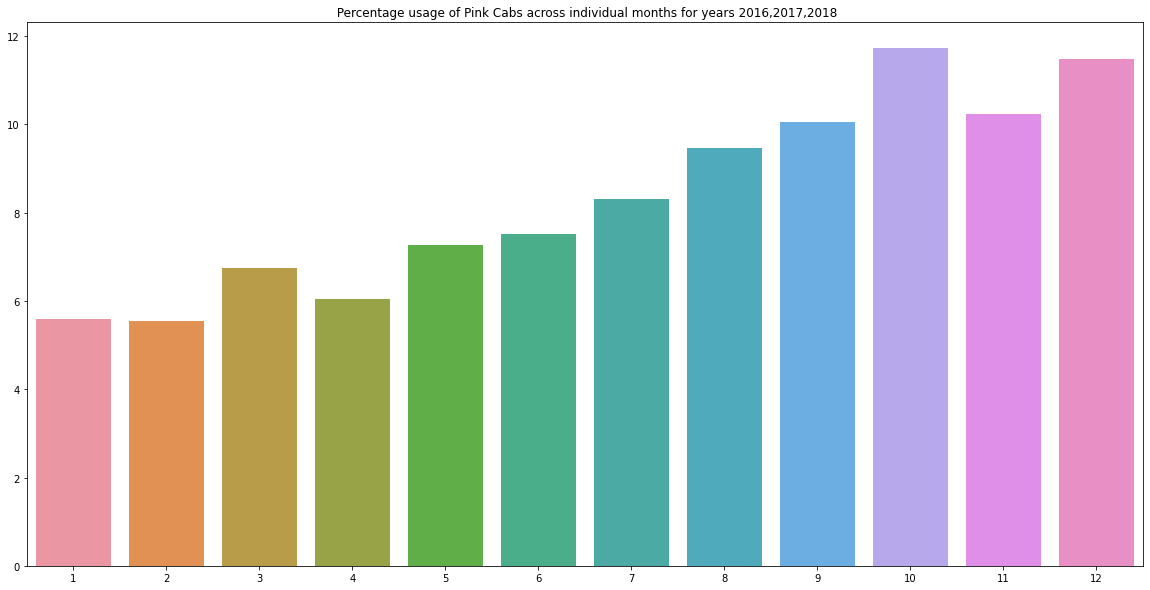

In [21]:
plt.figure(figsize=(20,10))

sns.barplot(x=list(pink_cab_monthly_Transactions_percentage.keys()),y=list(pink_cab_monthly_Transactions_percentage.values()))
plt.title(' Percentage usage of Pink Cabs across individual months for years 2016,2017,2018')
plt.show()

In [22]:
# yellow cab monthly percentage usage.
yellow_cab_monthly_Transactions_percentage={}
yellow_cab_transactions_sum=monthly_transactions_for_yellowcab.sum()
for x,y in monthly_transactions_for_yellowcab.items():
  yellow_cab_monthly_Transactions_percentage[x]=(y/yellow_cab_transactions_sum)*100
print(yellow_cab_monthly_Transactions_percentage)

{1: 6.228315755367135, 2: 6.3120492498571075, 3: 7.555673672369038, 4: 6.945147279935634, 5: 7.757726235160059, 6: 7.4879587594336705, 7: 8.43778783388731, 8: 8.74723770482851, 9: 9.238716911617477, 10: 10.657089496543264, 11: 9.661389029455988, 12: 10.97090807154481}


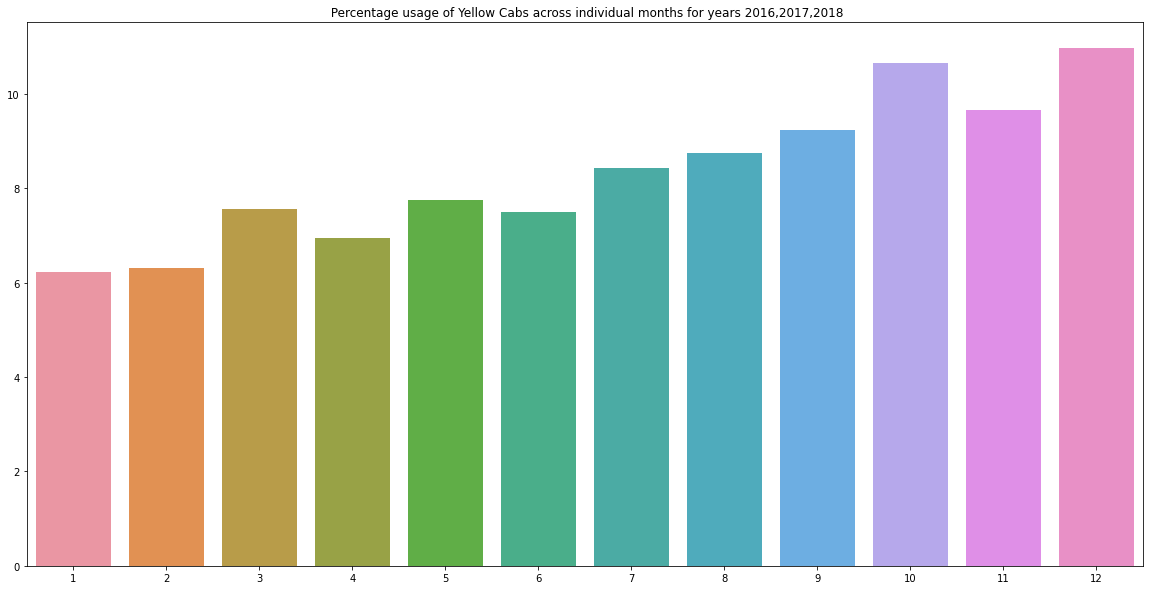

In [23]:
plt.figure(figsize=(20,10))

sns.barplot(x=list(yellow_cab_monthly_Transactions_percentage.keys()),y=list(yellow_cab_monthly_Transactions_percentage.values()))
plt.title(' Percentage usage of Yellow Cabs across individual months for years 2016,2017,2018')
plt.show()

In [24]:
print(combined_data.head(20))

    Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0         10000011     2016-08-01    Pink Cab  ATLANTA GA         30.45   
1         10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2         10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3         10000012     2016-06-01    Pink Cab  ATLANTA GA         28.62   
4         10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   
5         10324737     2018-04-05  Yellow Cab  ATLANTA GA          6.18   
6         10395626     2018-10-27    Pink Cab  ATLANTA GA         13.39   
7         10000013     2016-02-01    Pink Cab  ATLANTA GA          9.04   
8         10079404     2016-09-21  Yellow Cab  ATLANTA GA         39.60   
9         10186994     2017-06-23  Yellow Cab  ATLANTA GA         18.19   
10        10320493     2018-04-21  Yellow Cab  ATLANTA GA         19.38   
11        10000014     2016-07-01    Pink Cab  ATLANTA GA         33.17   
12        10094994     20

Calculating and adding profit, profit percentage and price charged per each ride and kilometers respectively.

In [25]:
# Calculating profit per ride, profit percentage per ride, price charged per kilometer from combined data and assigning those to new columns.
combined_data['profit_per_ride']=combined_data['Price_Charged']-combined_data['Cost_of_Trip']
combined_data['profit_percentage_per_ride']=(combined_data['profit_per_ride']/combined_data['Cost_of_Trip'])*100
combined_data['price_charged_per_KM']=combined_data['Price_Charged']/combined_data['KM_Travelled']



In [26]:
combined_data.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,months,year,profit_per_ride,profit_percentage_per_ride,price_charged_per_KM
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",8,2016,57.3150,18.274427,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",7,2018,281.2772,88.612790,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",11,2018,194.6480,32.582415,18.614571
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",6,2016,23.6660,7.067558,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",4,2018,253.9808,54.371732,19.821330
5,10324737,2018-04-05,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",4,2018,50.8912,58.155523,22.394822
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701",10,2018,25.0960,17.681458,12.474235
7,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2,2016,27.5680,28.236644,13.849558
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",9,2016,210.0920,42.510846,17.785354
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701",6,2017,118.9736,48.234548,20.100605


Text(0, 0.5, 'Yellow Cab')

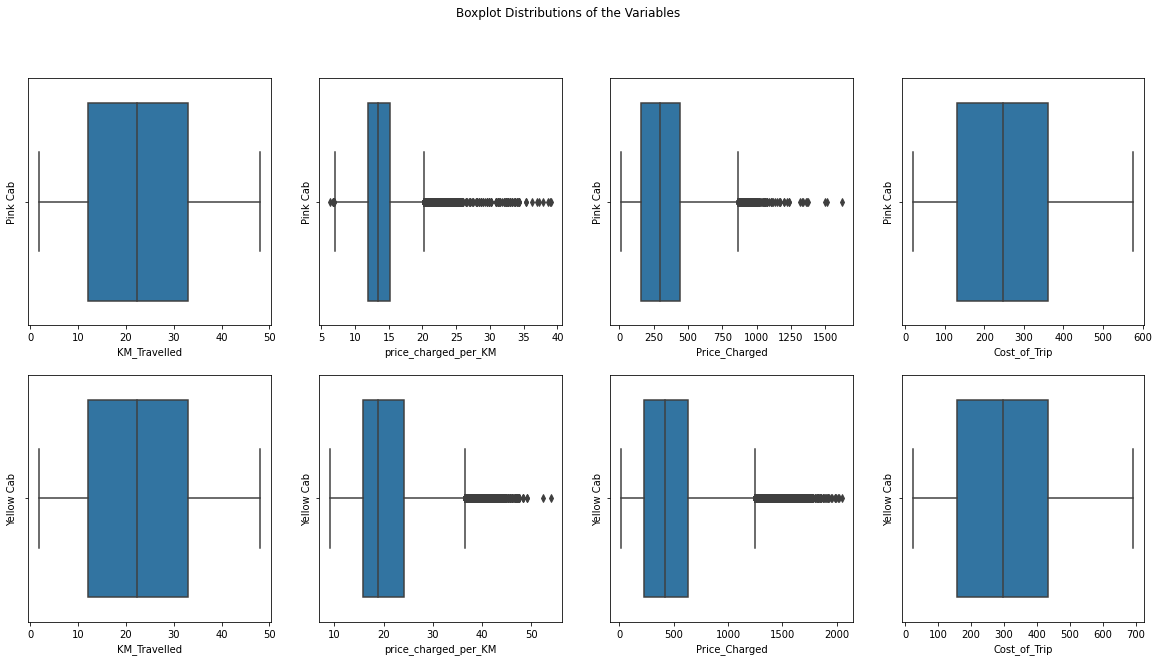

In [27]:
pinkcab_data=combined_data[combined_data['Company']=='Pink Cab']
yellowcab_data=combined_data[combined_data['Company']=='Yellow Cab']

fig,axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled',data=pinkcab_data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='price_charged_per_KM',data=pinkcab_data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Price_Charged',data=pinkcab_data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,3], x='Cost_of_Trip',data=pinkcab_data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled',data=yellowcab_data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='price_charged_per_KM',data=yellowcab_data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Price_Charged',data=yellowcab_data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,3], x='Cost_of_Trip',data=yellowcab_data ).set_ylabel("Yellow Cab")

# Observations:
# It is clear that for both cabs the distribution of km_travelled is same 
# The price charged is different for both companies. Box plot depicts that Yellow cab has charged more than pink cab. The reasons for the both difference in price charged and outliers could be either availability of cabs or bad weather or orders that includes high end vehicles and this can be found out in later analysis.
# Though the median in price_charged_km looks same for both the distribution of the values and outliers are different for both and again in this case yellow cab seems to be charging more price per km. 
# For the case of Cost_of_trip the median is same for both cases but the extreme values in the distribution are different and again yellow cab wins in this and the possible reasons could be bad weather or booking of high end vehicle.

Hypothesis 2: Does charging less-price per kilometer leads to more bookings.

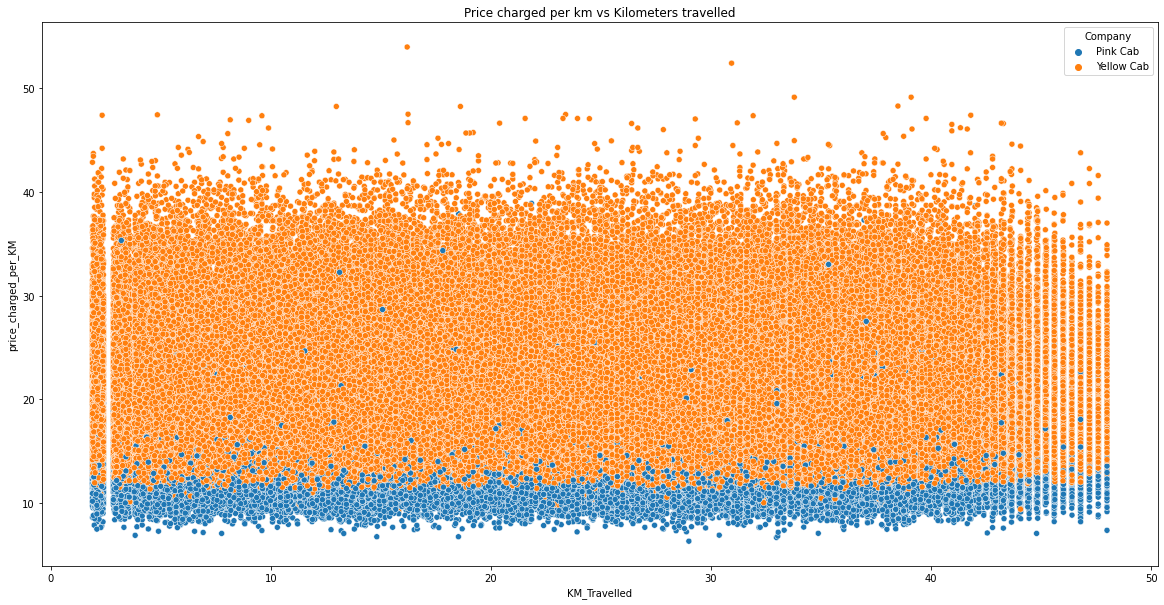

In [28]:

plt.figure(figsize=(20,10))
sns.scatterplot(data=combined_data, x="KM_Travelled", y="price_charged_per_KM", hue="Company")
plt.title('Price charged per km vs Kilometers travelled')
plt.show()
# Previous Observations:
# Since, it is clear that profit_per_ride is more for yellow cab than a pink cab but we still dont know what could be more plausible reason for this findings. 
# So, here we are checking a graph of (Price charged per km vs Kilometers travelled) this graph could give glimpse of number of bookings for each company and also the relation between less price per kilometer and no of cab bookings.
# Present Findings:
# Since, The graph depicts that yellow cabs has more bookings compared to pink cab and also it tells that there is no relation between price_per_kilometer and no of bookings. 
# So, From the graph it is clear that less_price_per_kilometer doesnt lead to more no of bookings as the price_per kilometer and no of bookings for yellow cab is more than pink cab.
# So, the findings helps in avoiding null hypothesis or proving null hypothesis is wrong.

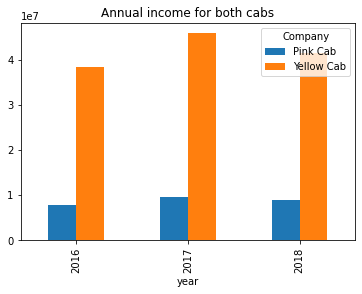

In [51]:
Transactions_Annual = combined_data.groupby(['year','Company']).Price_Charged.sum().unstack()

plot = Transactions_Annual.plot(kind='bar',stacked = False, title = 'Annual income for both cabs')
plt.show()

<AxesSubplot:xlabel='profit_percentage_per_ride', ylabel='Count'>

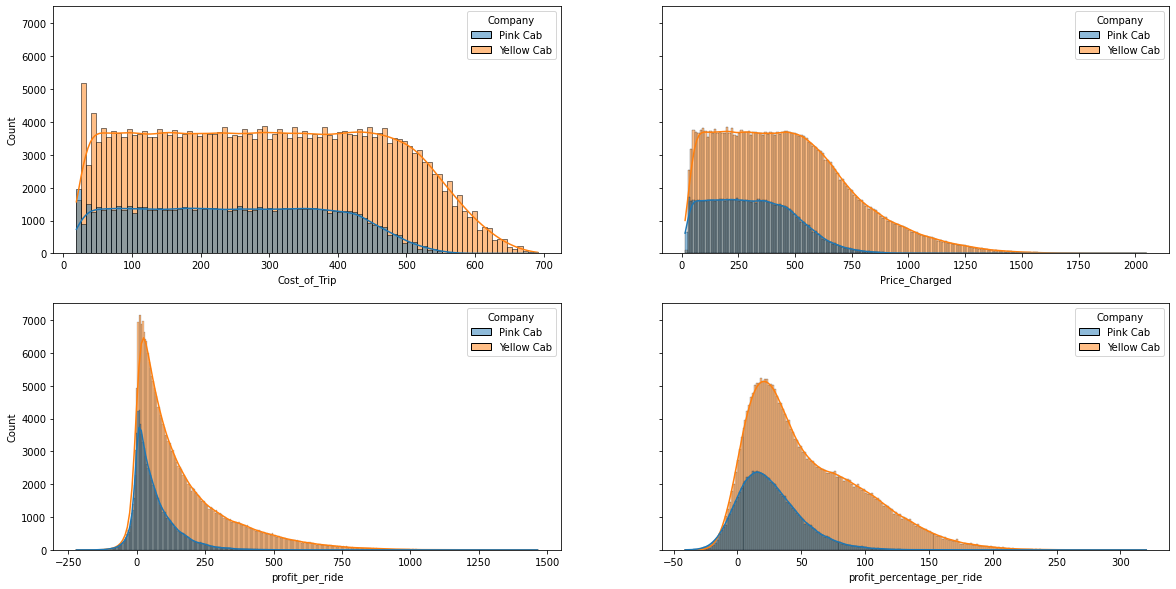

In [30]:
fig,axes = plt.subplots(2, 2 , figsize=(20,10), sharey=True)
sns.histplot(ax=axes[0,0], data=combined_data , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=combined_data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=combined_data , x='profit_per_ride' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=combined_data , x='profit_percentage_per_ride' , kde = True , hue="Company")
# It is clear that cost of trip, price charged and profit per ride is more for yellow cabs. It means that either most people prefer yellow cabs over pink cabs or yellow cabs have different model cars that makes them more expensive. The former one is most applicable.

54.440974584047495
54.20035433052672
25.605814204360627
25.52857171639067


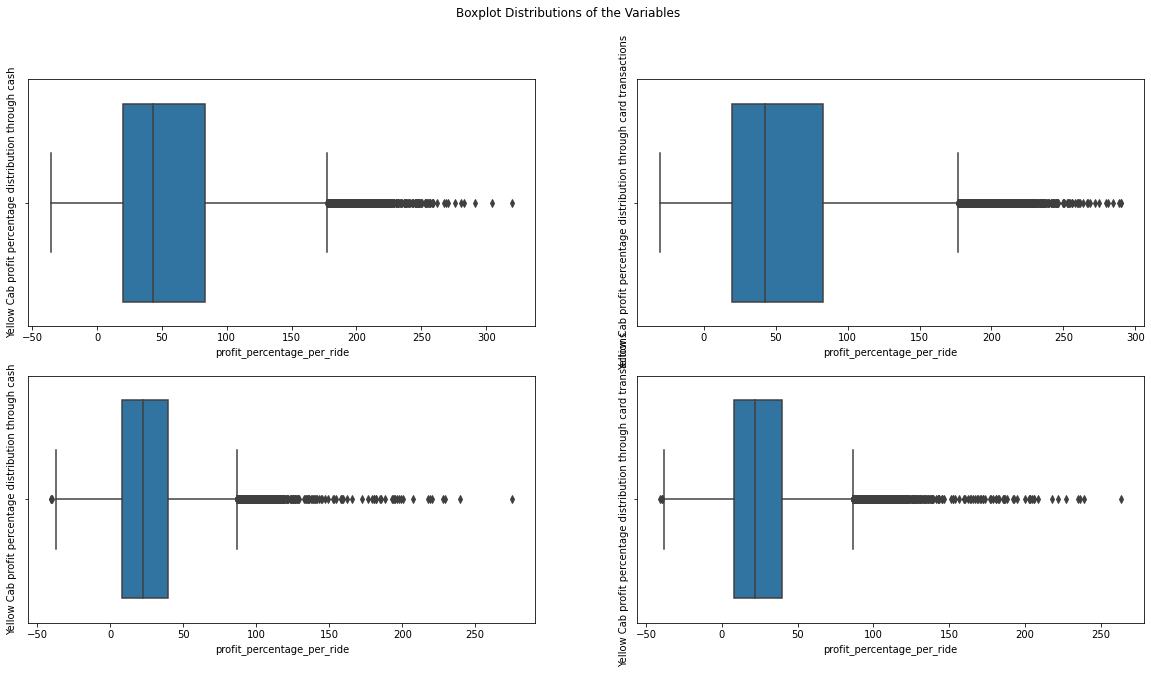

In [37]:
fig,axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='profit_percentage_per_ride',data=combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Yellow Cab')] ).set_ylabel("Yellow Cab profit percentage distribution through cash")
sns.boxplot(ax=axes[0,1], x='profit_percentage_per_ride',data=combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Yellow Cab')] ).set_ylabel("Yellow Cab profit percentage distribution through card transactions")
sns.boxplot(ax=axes[1,0], x='profit_percentage_per_ride',data=combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Pink Cab')] ).set_ylabel("Pink Cab profit percentage distribution through cash")
sns.boxplot(ax=axes[1,1], x='profit_percentage_per_ride',data=combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Pink Cab')] ).set_ylabel("Pink Cab profit percentage distribution through card transactions")
print(combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Yellow Cab')].profit_percentage_per_ride.mean())
print(combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Yellow Cab')].profit_percentage_per_ride.mean())
print(combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Pink Cab')].profit_percentage_per_ride.mean())
print(combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Pink Cab')].profit_percentage_per_ride.mean())

# Though there are outliers for profit_percentage_per_ride for both cabs but it doesnt mean that they are invalid or something. From the context of information, we can either think the outliers could be from the usage of high end vehicles or bad weather or emergency bookings etc... 
# So, there is no information about all the mentioned categories in data. So, the outliers are not removed and considered as valid data.

Hypothesis 3: Does more availability of more cabs in an area leads to more income(Null Hypothesis)?


Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1762        5795
AUSTIN TX           1868        3028
BOSTON MA           5186       24506
CHICAGO IL          9361       47264
DALLAS TX           1380        5637
DENVER CO           1394        2431
LOS ANGELES CA     19865       28168
MIAMI FL            2002        4452
NASHVILLE TN        1841        1169
NEW YORK NY        13967       85918
ORANGE COUNTY       1513        2469
PHOENIX AZ           864        1200
PITTSBURGH PA        682         631
SACRAMENTO CA       1334        1033
SAN DIEGO CA       10672        9816
SEATTLE WA          2732        5265
SILICON VALLEY      3797        4722
TUCSON AZ            799        1132
WASHINGTON DC       3692       40045


<Figure size 1440x2160 with 0 Axes>

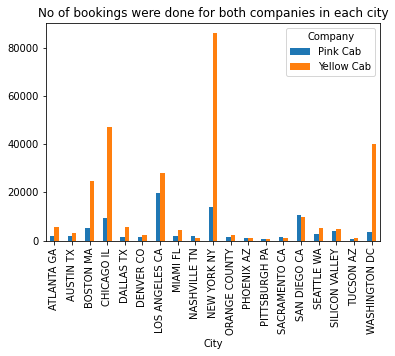

In [31]:
No_of_transactions_among_cities=combined_data.groupby(["City","Company"]).Transaction_ID.count().unstack()
print(No_of_transactions_among_cities)
plt.figure(figsize=(20,30))
plot = No_of_transactions_among_cities.plot(kind='bar',stacked = False, title = 'No of bookings were done for both companies in each city')
plt.show()
# Previous observations:
# It is clear from previous graphs that price_charged, profit_per_ride and no of bookings are more for yellow cab than the pink cab.
# So, in this case we are going to find out whether more availability of cabs leads to more income for a cab company.
# Present Findings:
# Since it is clear from the previous graphs that profit_per_ride and price_charged is more for yellow cabs and from present findings the availability of yellow cabs in each city is more than pink cabs.
# So, it can be concluded that more availability of cabs leads to more income given that profit_per_ride is more or significant enough compared to other cab companies.
# From findings, it is clear that we fail to avoid null hypothesis i.e., found a positive relationship between availability of cabs and income.

Hypothesis 4: Does online payment or payment through card gives more profit percentage than made through cash for both cabs?

City
ATLANTA GA         44.770869
AUSTIN TX          41.360700
BOSTON MA          20.979130
CHICAGO IL         22.048411
DALLAS TX          65.764569
DENVER CO          49.180025
LOS ANGELES CA     39.894646
MIAMI FL           44.590313
NASHVILLE TN       24.498944
NEW YORK NY       104.489003
ORANGE COUNTY      49.993868
PHOENIX AZ         46.033680
PITTSBURGH PA      41.042170
SACRAMENTO CA      19.661265
SAN DIEGO CA       32.998134
SEATTLE WA         31.789201
SILICON VALLEY     68.863982
TUCSON AZ          22.113208
WASHINGTON DC      27.777526
Name: profit_percentage_per_ride, dtype: float64
The average profit percentage made by Yellow cab throughout all cities for three years through cash is: 41.99208662356942
The average profit percentage made by Yellow cab throughout all cities for three years through card is: 41.71594547335038
The average profit percentage made by Pink cab throughout all cities for three years through cash is: 22.493104757871485
The average profit percentage 

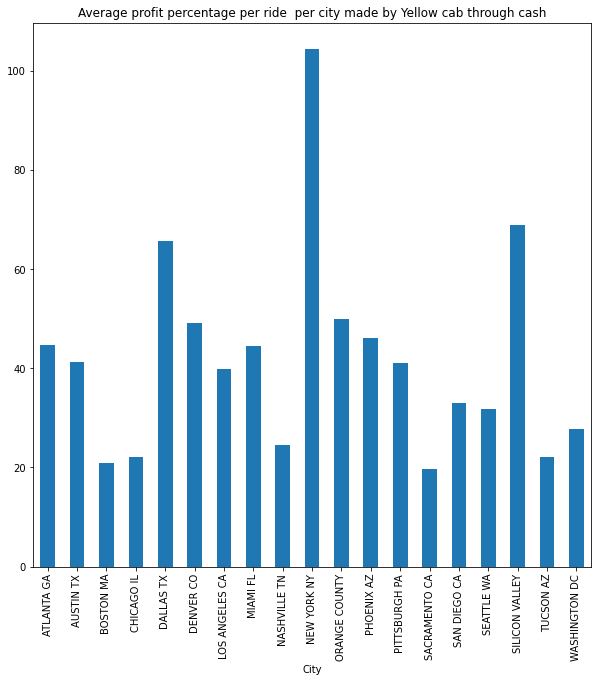

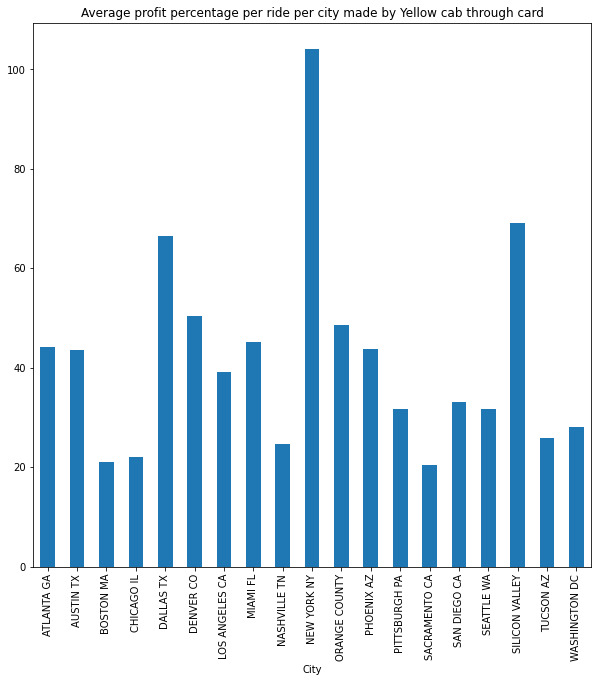

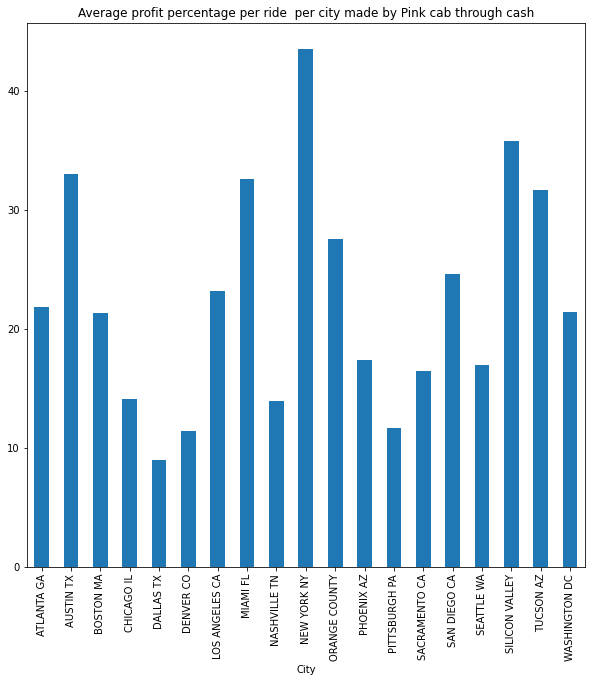

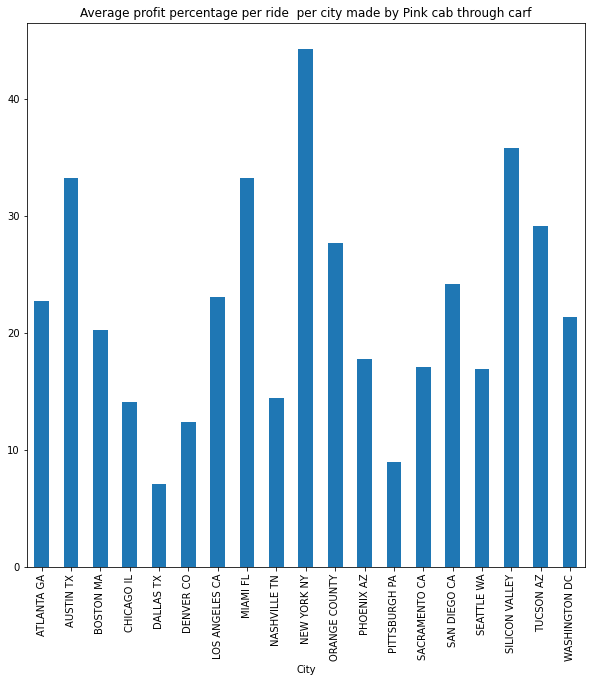

In [55]:
yellowcab_cash_transaction_profit_percent_average=combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Yellow Cab')].groupby('City').profit_percentage_per_ride.mean()
yellowcab_card_transaction_profit_percent_average=combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Yellow Cab')].groupby('City').profit_percentage_per_ride.mean()
pinkcab_cash_transaction_profit_percent_average=combined_data[(combined_data['Payment_Mode']=='Cash')&(combined_data['Company']=='Pink Cab')].groupby('City').profit_percentage_per_ride.mean()
pinkcab_card_transaction_profit_percent_average=combined_data[(combined_data['Payment_Mode']=='Card')&(combined_data['Company']=='Pink Cab')].groupby('City').profit_percentage_per_ride.mean()
print(yellowcab_cash_transaction_profit_percent_average)
print("The average profit percentage made by Yellow cab throughout all cities for three years through cash is:",yellowcab_cash_transaction_profit_percent_average.mean())
print("The average profit percentage made by Yellow cab throughout all cities for three years through card is:",yellowcab_card_transaction_profit_percent_average.mean())
print("The average profit percentage made by Pink cab throughout all cities for three years through cash is:",pinkcab_cash_transaction_profit_percent_average.mean())
print("The average profit percentage made by Pink cab throughout all cities for three years through cash is:",pinkcab_card_transaction_profit_percent_average.mean())

plt.figure(figsize=(10,10))
plot = yellowcab_cash_transaction_profit_percent_average.plot(kind='bar',stacked = False, title = 'Average profit percentage per ride  per city made by Yellow cab through cash')
plt.show()
plt.figure(figsize=(10,10))
plot =yellowcab_card_transaction_profit_percentaverage.plot(kind='bar',stacked = False, title = 'Average profit percentage per ride per city made by Yellow cab through card')
plt.show()
plt.figure(figsize=(10,10))
plot =pinkcab_cash_transaction_profit_percent_average.plot(kind='bar',stacked = False, title = 'Average profit percentage per ride  per city made by Pink cab through cash')
plt.show()
plt.figure(figsize=(10,10))
plot = pinkcab_card_transaction_profit_percent_average.plot(kind='bar',stacked = False, title = 'Average profit percentage per ride  per city made by Pink cab through carf')
plt.show()

# Present Findings:
# From the averages of profit percentage for each cities for both cabs(Pink cab and Yellow cab), It is clear that there is no difference in profit percentage made through card and cash payments.
# So, from the evidences it is clear we successfully avoid null hypothesis.


Hypothesis 5: Does female population use more cabs than male populations?

Gender
Female    37480
Male      47231
Name: Customer_ID, dtype: int64


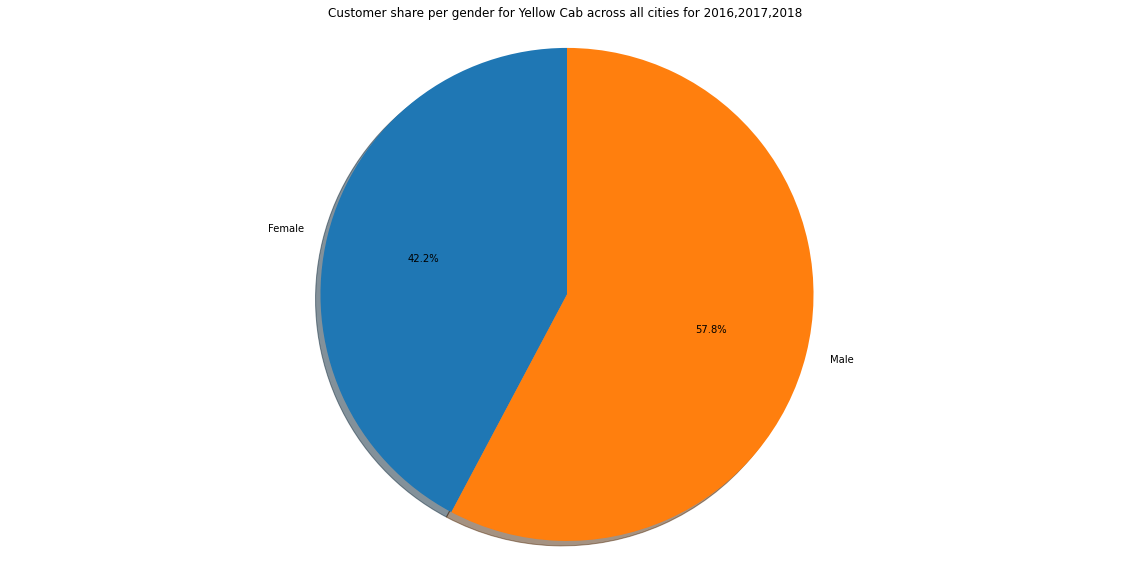

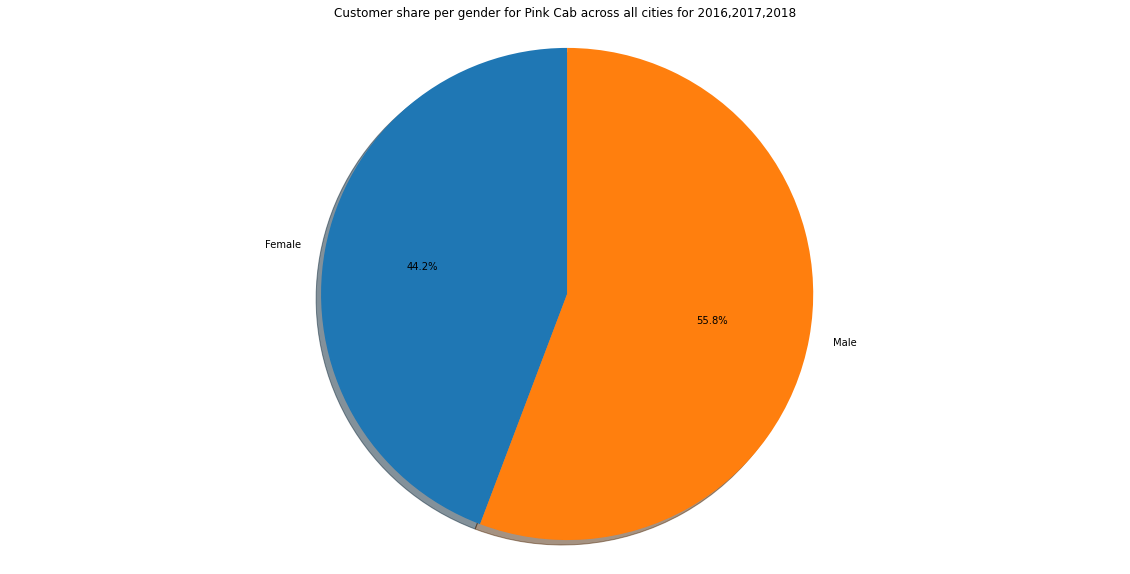

In [56]:
gender_cab=combined_data.groupby(['Company','Gender']).Customer_ID.count()
print(gender_cab['Pink Cab'])
labs = gender_cab['Yellow Cab'].index
vals = gender_cab['Yellow Cab'].values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Customer share per gender for Yellow Cab across all cities for 2016,2017,2018')
plt.show()
labs = gender_cab['Pink Cab'].index
vals = gender_cab['Pink Cab'].values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Customer share per gender for Pink Cab across all cities for 2016,2017,2018')
plt.show()



<Figure size 720x720 with 0 Axes>

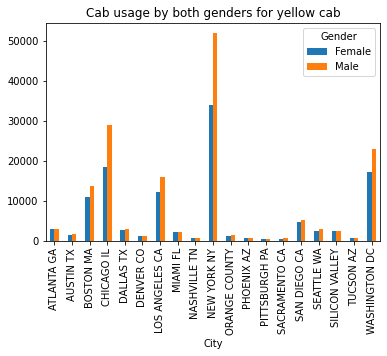

In [65]:
Yellowcab_Gender_each_city=combined_data[combined_data['Company']=='Yellow Cab'].groupby(['City','Gender']).Customer_ID.count().unstack()
plt.figure(figsize=(10,10))
plot = Yellowcab_Gender_each_city.plot(kind='bar',stacked = False, title = 'Cab usage by both genders for yellow cab')
plt.show()


<Figure size 720x720 with 0 Axes>

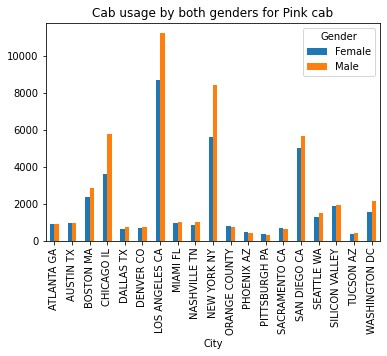

In [66]:
Pinkcab_Gender_each_city=combined_data[combined_data['Company']=='Pink Cab'].groupby(['City','Gender']).Customer_ID.count().unstack()
plt.figure(figsize=(10,10))
plot = Pinkcab_Gender_each_city.plot(kind='bar',stacked = False, title = 'Cab usage by both genders for Pink cab')
plt.show()
# Present Findings:
# From pie chart and bar graphs it is clear that in almost every city male customers are more than female customers for both companies.
# So, we succeeded in avoiding null hypothesis.

 Hypothesis Results:

1) Does the income in the holiday months of november,december is going to be more than 20% of remaining months individually in a year (Null Hypothesis)?

ans) Yes it turns out november,december on an average has 20% more income than average of other months. So,we fail to reject null hypothesis.

2) Does charging less-price per kilometer leads to more bookings?

ans) So, according to the profit per ride and no of booking for each company. It turns out less-price per kilometer cannot lead to more bookings. So, we successfully avoid null hypothesis.

3) Does more availability of more cabs in an area leads to more income?

ans) So, from profit_per_ride and availability graphs it turns out that more availability of cabs in a city or area leads to more income. So we fail to reject null hypothesis.

4) Does online payment or payment through card gives more profit percentage than made through cash for both cabs?

ans) Actually it was observed that there is no difference in average profit percentage between these payment methods. So we can reject null hypothesis.

5) Does female population use more cabs than male populations?

ans) No it turns out male population use more cabs compared to female populations. So, we can reject null hypothesis.

Main Results:
Findings from above suggests to invest in yellow company based on profit_per_ride, availability and also increase in usuage of yellow cabs over the years. Though yellow cab charges more than pink cab it seems that availability of yellow cabs makes difference and leading to more profits in each year. So, it is better to invest in yellow cabs.